In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings("ignore")

#depdelay=ritardo partenza
#arrdelay con depdelay


In [21]:
data=pd.read_csv('dataset/finalePython.csv')
data=data.drop('countrydest',axis=1)
data=data.drop('dayofweek',axis=1)
data=data.drop('month',axis=1)
data=data.drop('day',axis=1)
data=data.drop('partofdayarr',axis=1)
data=data.drop('partofdaydep',axis=1)
data=data.drop(['countryorig','airportdest'],axis=1)
data=data.drop(['airportorig','airline','statenamedest','regiondest','statenameorig','regionorig'],axis=1)
#data['partofdaydep']=data['partofdaydep'].apply(lambda x: 1 if x=='PM' else 0)
#data['partofdayarr']=data['partofdayarr'].apply(lambda x: 1 if x=='PM' else 0)
#aggiungere lambda function con fasce di ritardo totale

In [ ]:
#data=data.drop('day',axis=1)
#data=data.drop('month',axis=1)
#data=data.drop('taxiIn',axis=1)
#data=data.drop('month',axis=1)

In [22]:
data=data.drop('flightnum',axis=1)
data=data.drop('tailnumid',axis=1)
#data=data.drop('taxiIn',axis=1)
#data=data.drop('taxiOut',axis=1)

Text(0, 0.5, 'Count')

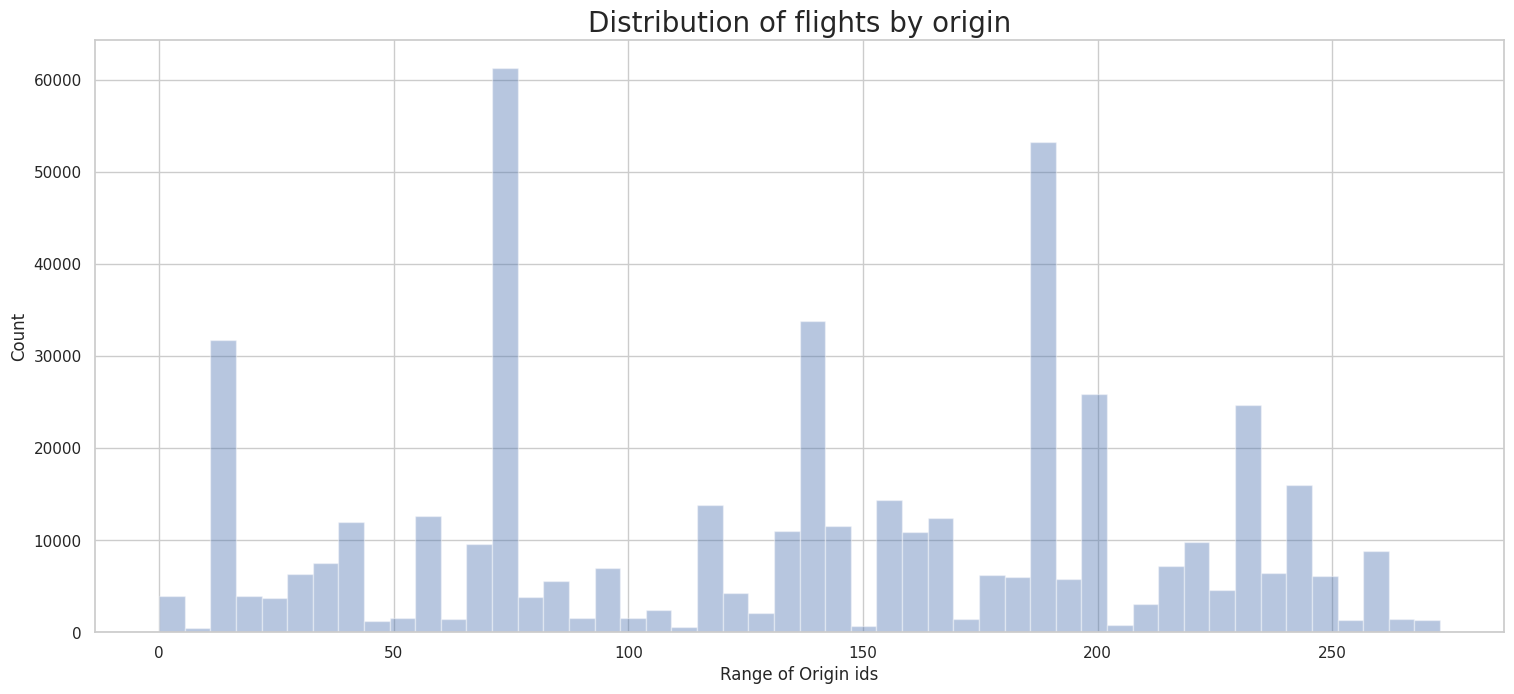

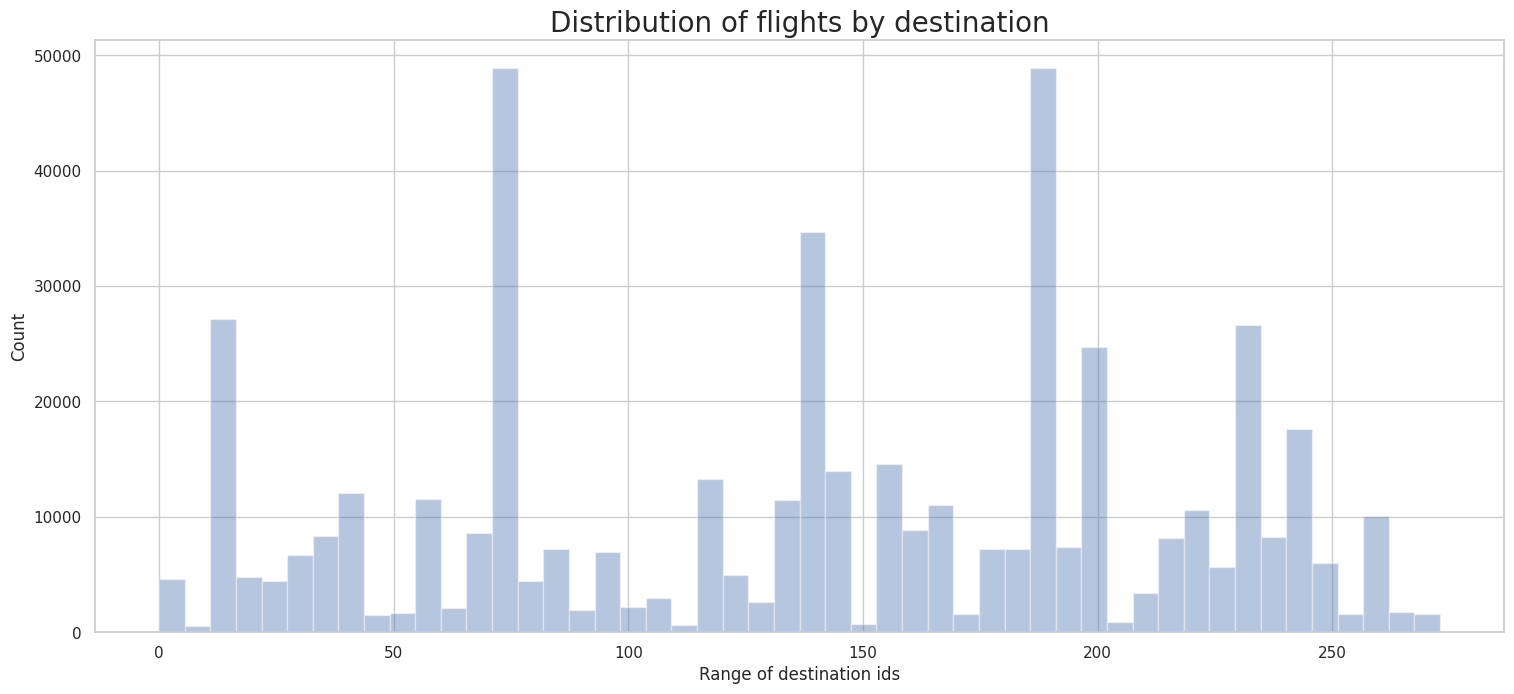

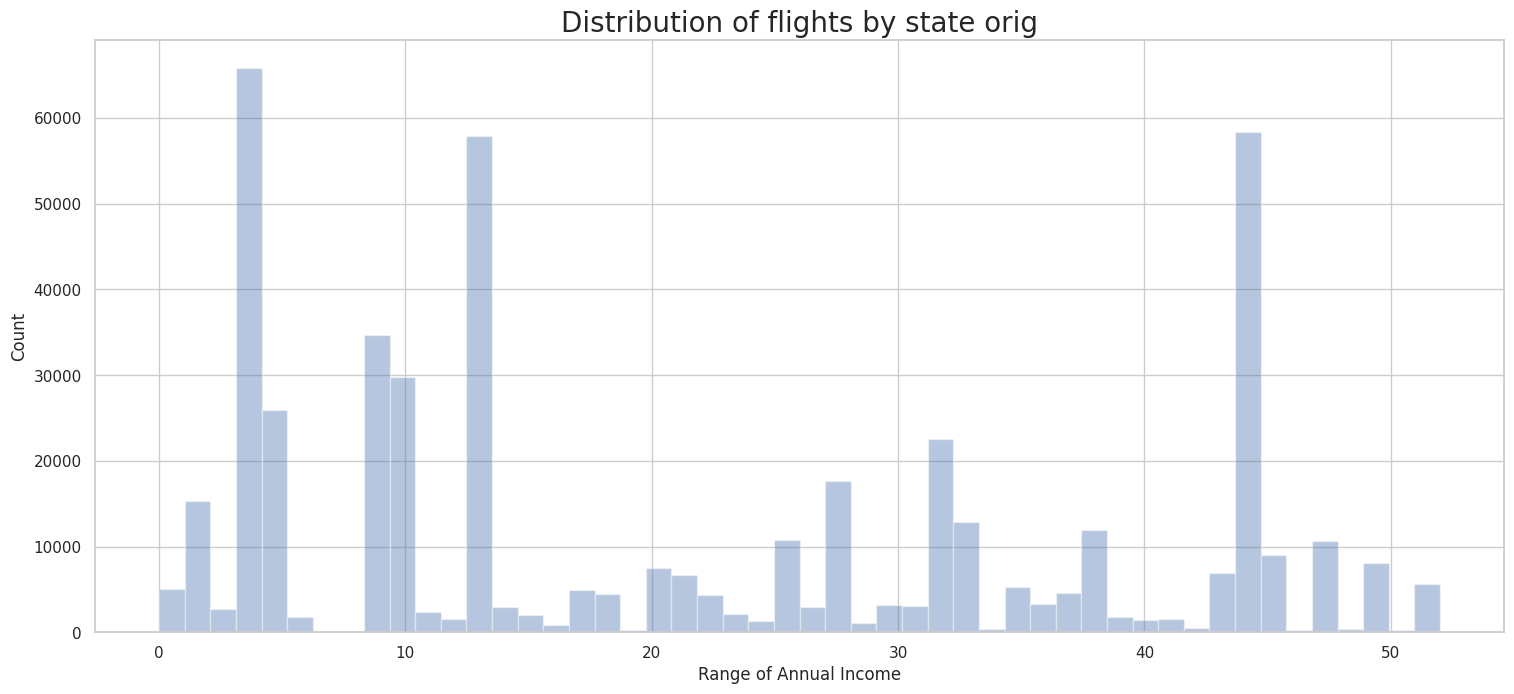

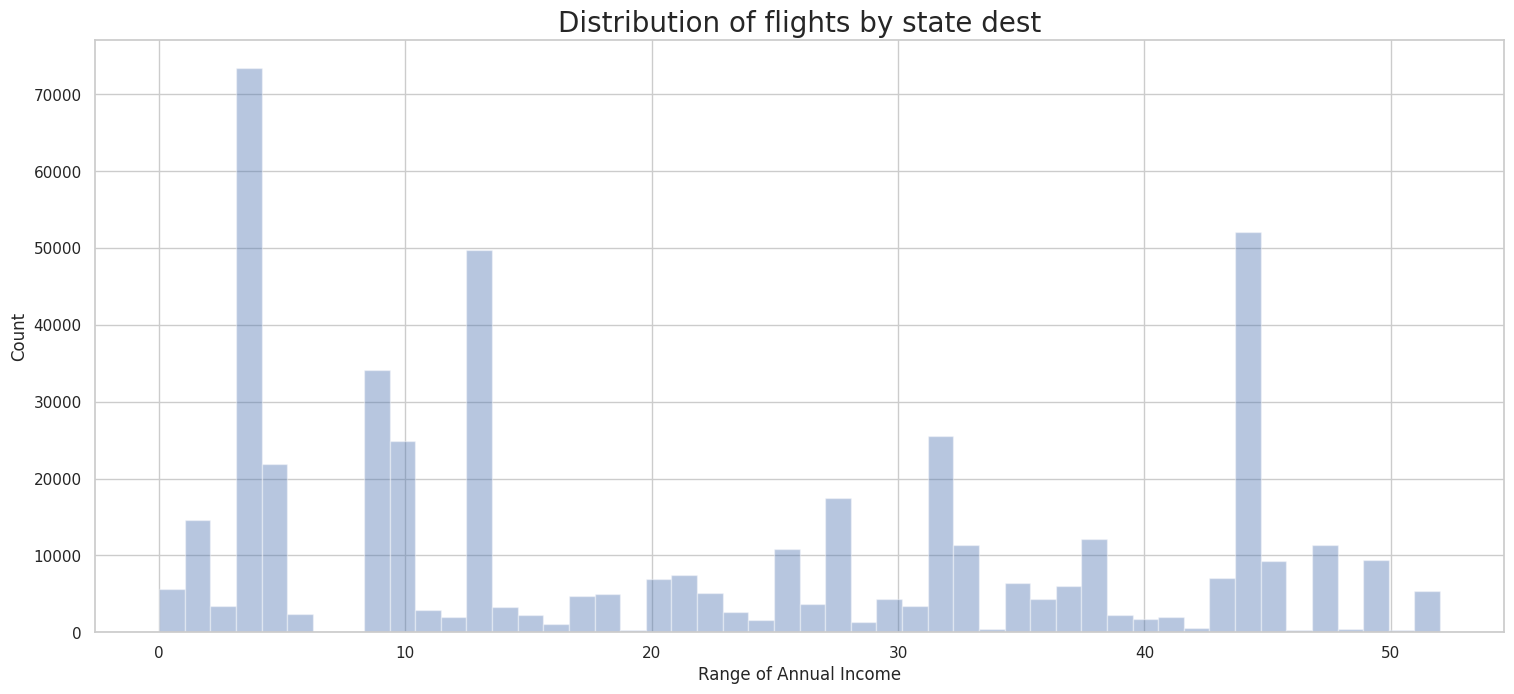

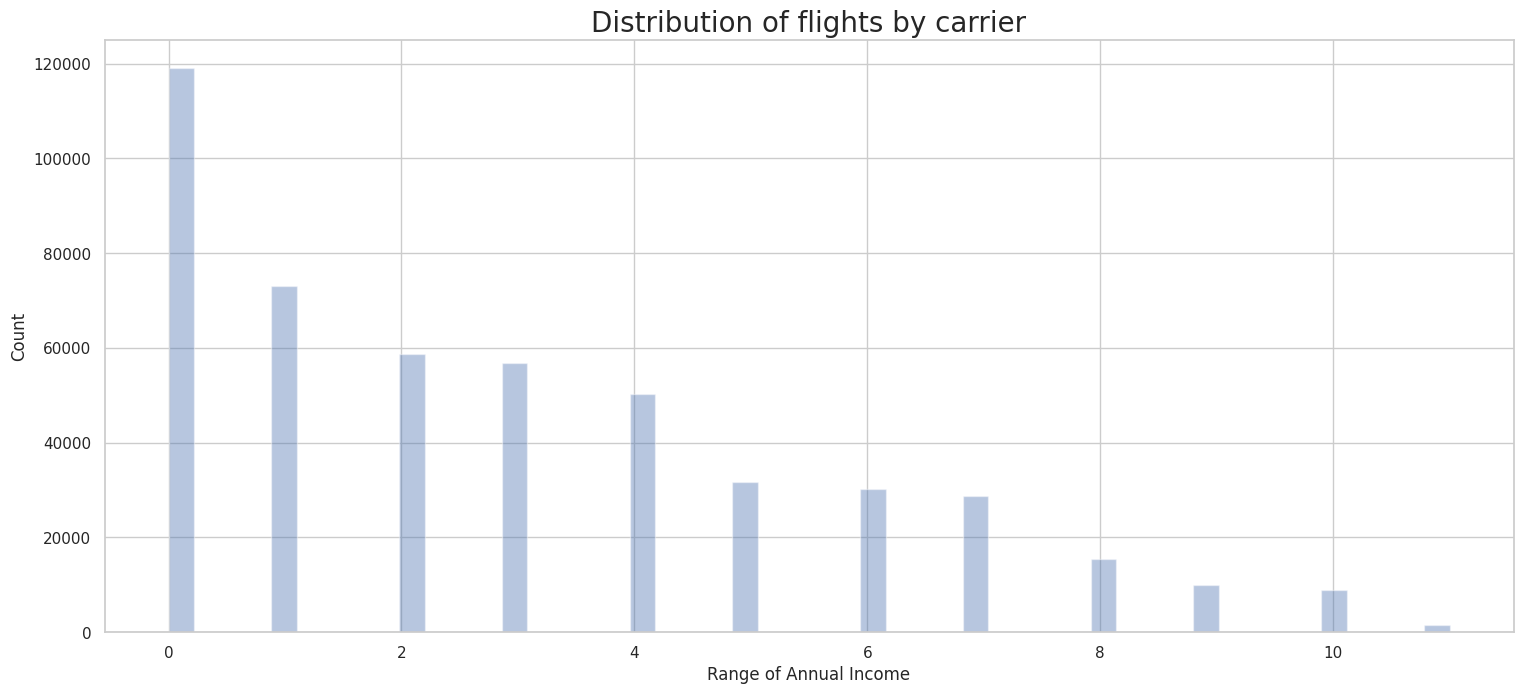

In [23]:
plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['iataorigid'], kde=False)
plt.title('Distribution of flights by origin', fontsize = 20)
plt.xlabel('Range of Origin ids')
plt.ylabel('Count')


plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['iatadestid'], kde=False)
plt.title('Distribution of flights by destination', fontsize = 20)
plt.xlabel('Range of destination ids')
plt.ylabel('Count')


plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['statecodeorigid'], kde=False)
plt.title('Distribution of flights by state orig', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['statecodedestid'], kde=False)
plt.title('Distribution of flights by state dest', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['uniquecarrierid'], kde=False)
plt.title('Distribution of flights by carrier', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')



### Analisi dei ritardi


### Analisi per compagnia(carrier)

In [24]:
ritardi=data[(data['carrierdelay']>0) | (data['weatherdelay']>0) | (data['nasdelay']>0) | (data['securitydelay']>0) | (data['lateaircraftdelay']>0)]
ritardi['totaldelay']=np.nan
for index,row in ritardi.iterrows():
  ritardi.at[index,'totaldelay']=row['carrierdelay']+row['weatherdelay']+row['nasdelay']+row['securitydelay']+row['lateaircraftdelay']

ritardi.head()


weekofmonth  deptime  airtime  crsarrtime  actualelapsedtime  \
0            1     1829       77        1925                 90   
1            1     1937      230        1940                240   
2            1     1644      107        1725                121   
3            1     1452      213        1625                228   
4            1     1323      110        1510                123   

   crselapsedtime  depdelay  iataorigid  iatadestid  distance  ...  \
0              90        34         125          42       515  ...   
1             250        67         125         138      1591  ...   
2             135        94         125         158       828  ...   
3             240        27         125         199      1489  ...   
4             135        28         125         257       838  ...   

   carrierdelay  weatherdelay  nasdelay  securitydelay  lateaircraftdelay  \
0             2             0         0              0                 32   
1            10             0         0              0                 47   
2             8             0         0              0                 72   
3             3             0         0              0                 12   
4             0             0         0              0                 16   

   statecodeorigid  statecodedestid  uniquecarrierid  arrdelay  totaldelay  
0               14               20                0        34        34.0  
1               14               28                0        57        57.0  
2               14                9                0        80        80.0  
3               14                2                0        15        15.0  
4               14                9                0        16        16.0  

[5 rows x 22 columns]

In [25]:
for col in data.columns:
  print(col)

print(len(data.columns))

weekofmonth
deptime
airtime
crsarrtime
actualelapsedtime
crselapsedtime
depdelay
iataorigid
iatadestid
distance
taxiIn
taxiOut
carrierdelay
weatherdelay
nasdelay
securitydelay
lateaircraftdelay
statecodeorigid
statecodedestid
uniquecarrierid
arrdelay
21


In [ ]:
#sns.pairplot(data)

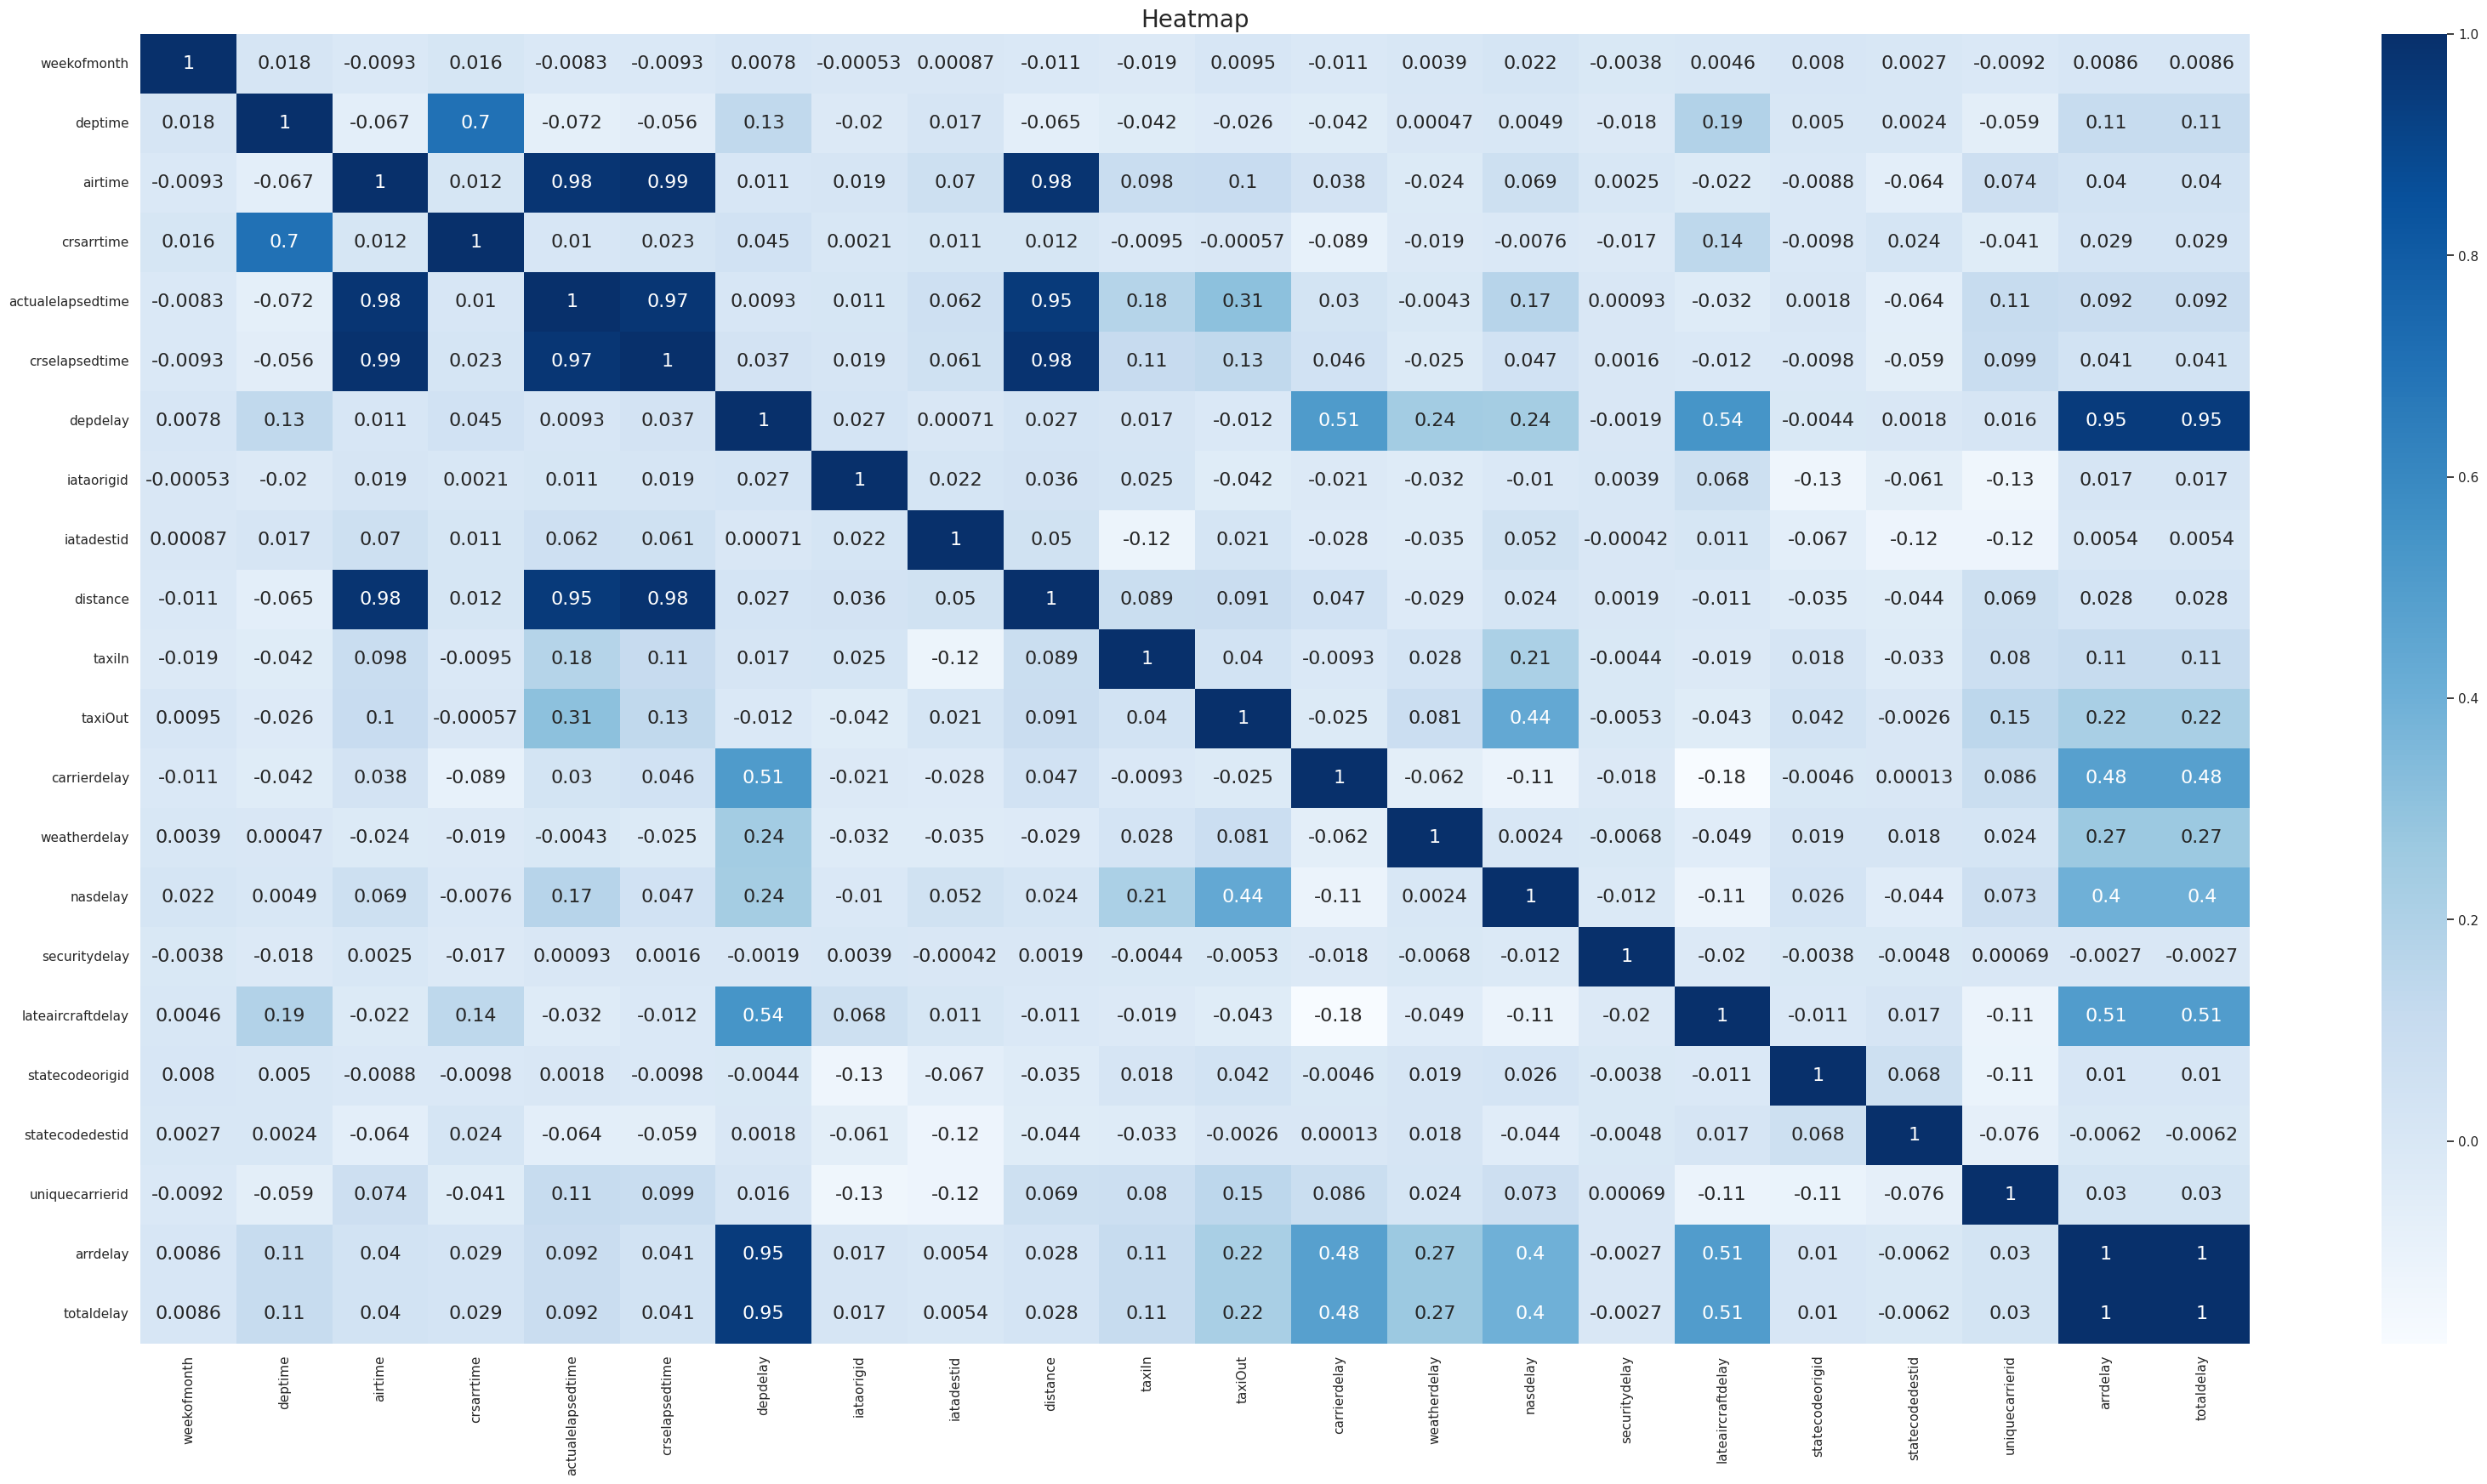

In [26]:
plt.figure(figsize=(40,20))
sns.heatmap(ritardi.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

In [28]:
ritardi_senza_zero=ritardi
print(len(ritardi_senza_zero))
zero = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==0]
one = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==1]
two = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==2]
three = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==3]
four = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==4]
five = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==5]
six = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==6]
seven = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==7]
eight = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==8]
nine = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==9]
balanced_data = pd.concat([nine, zero.sample(len(nine)), one.sample(len(nine)), two.sample(len(nine)), three.sample(len(nine)), four.sample(len(nine)), five.sample(len(nine)), six.sample(len(nine)), seven.sample(len(nine)), eight.sample(len(nine)), nine.sample(len(nine))])
print(one.shape,two.shape,three.shape,four.shape,five.shape,six.shape,seven.shape,eight.shape,nine.shape)
print(balanced_data.shape)

484551
(73053, 22) (58698, 22) (56896, 22) (50384, 22) (31755, 22) (30220, 22) (28678, 22) (15364, 22) (10000, 22)
(110000, 22)


In [49]:
for col in balanced_data.columns:
  print(col)

print(len(balanced_data.columns))

weekofmonth
deptime
airtime
crsarrtime
actualelapsedtime
crselapsedtime
depdelay
iataorigid
iatadestid
distance
taxiIn
taxiOut
carrierdelay
weatherdelay
nasdelay
securitydelay
lateaircraftdelay
statecodeorigid
statecodedestid
uniquecarrierid
arrdelay
totaldelay
22


In [30]:
x = balanced_data.loc[:,['carrierdelay', 'weatherdelay']].values
y = balanced_data.loc[:, 'uniquecarrierid'].values

Text(0, 0.5, 'wcss')

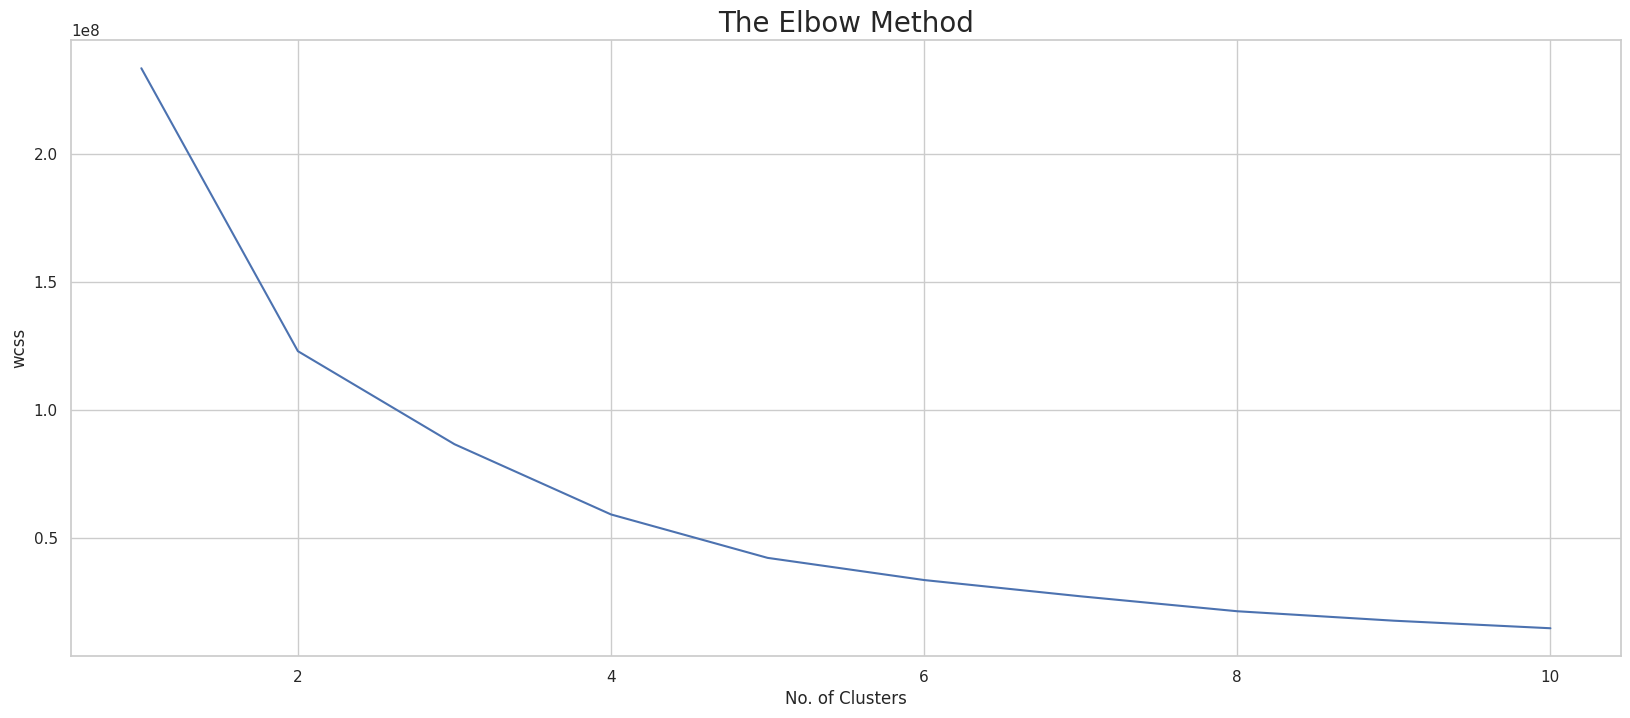

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

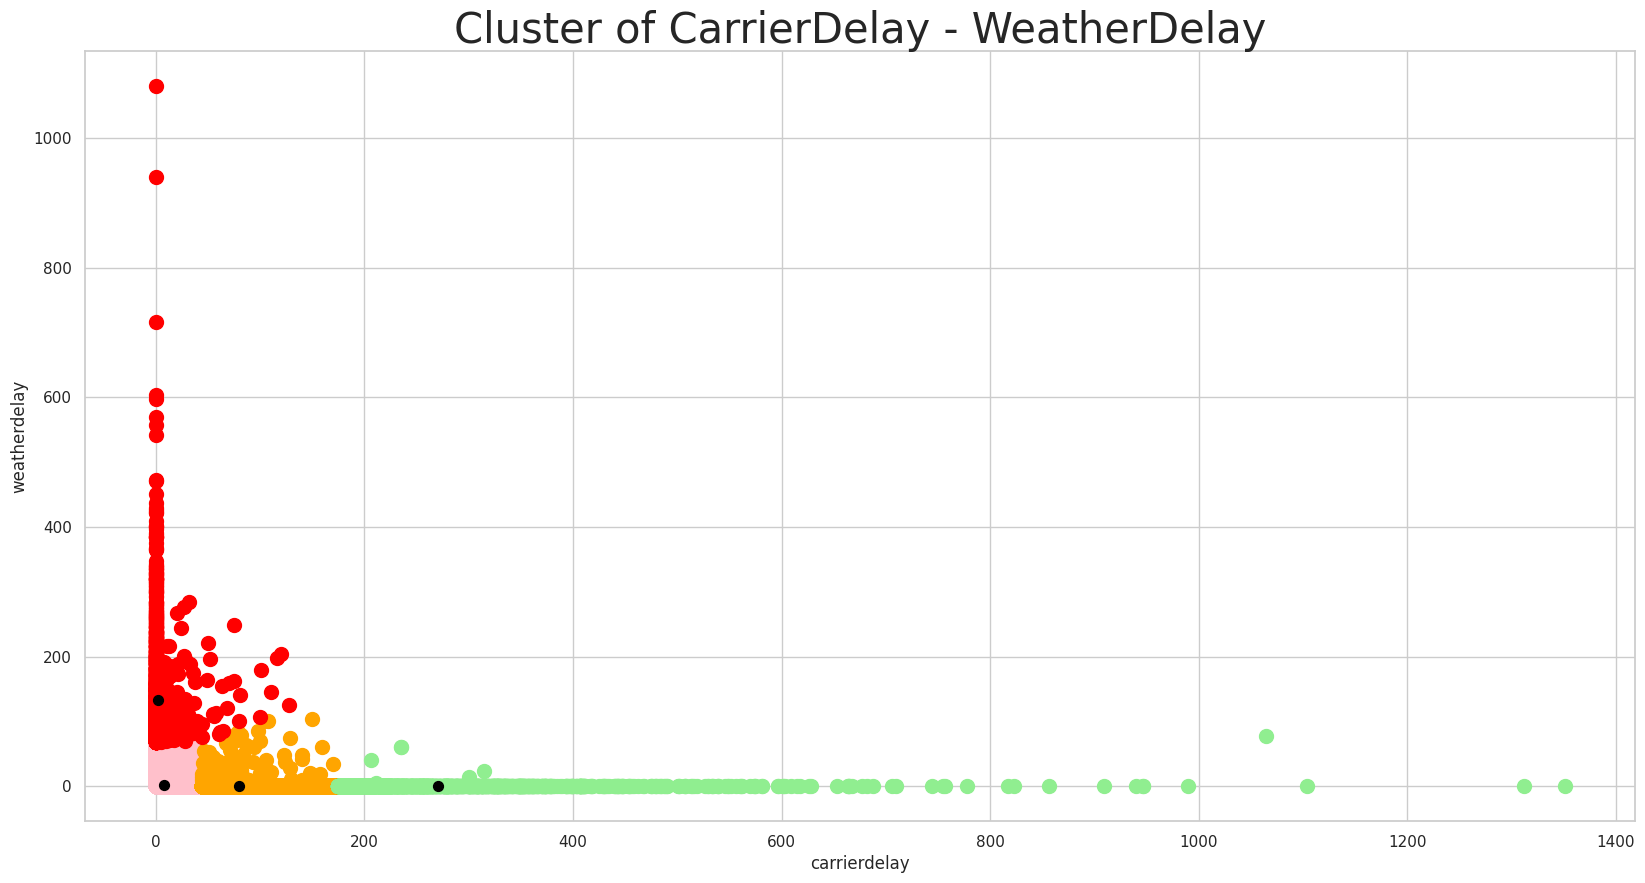

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(20,10))
plt.title('Cluster of CarrierDelay - WeatherDelay', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red')
plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'brown')
# plt.scatter(x[ymeans == 5, 0], x[ymeans == 5, 1], s = 100, c = 'purple')
# plt.scatter(x[ymeans == 6, 0], x[ymeans == 6, 1], s = 100, c = 'brown')
# plt.scatter(x[ymeans == 7, 0], x[ymeans == 7, 1], s = 100, c = 'blue')
# plt.scatter(x[ymeans == 8, 0], x[ymeans == 8, 1], s = 100, c = 'grey')
# plt.scatter(x[ymeans == 9, 0], x[ymeans == 9, 1], s = 100, c = 'green')
# plt.scatter(x[ymeans == 10, 0], x[ymeans == 10, 1], s = 100, c = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('carrierdelay')
plt.ylabel('weatherdelay')
plt.show()

In [ ]:
from collections import Counter
Counter(ymeans)

Counter({0: 75305, 1: 10363, 2: 951, 3: 1392})

##### Confusion matrix

### carrier delay  | total delay

In [14]:
x = balanced_data.loc[:,['arrdelay', 'airtime']].values
y = balanced_data.loc[:, 'uniquecarrierid'].values

Text(0, 0.5, 'wcss')

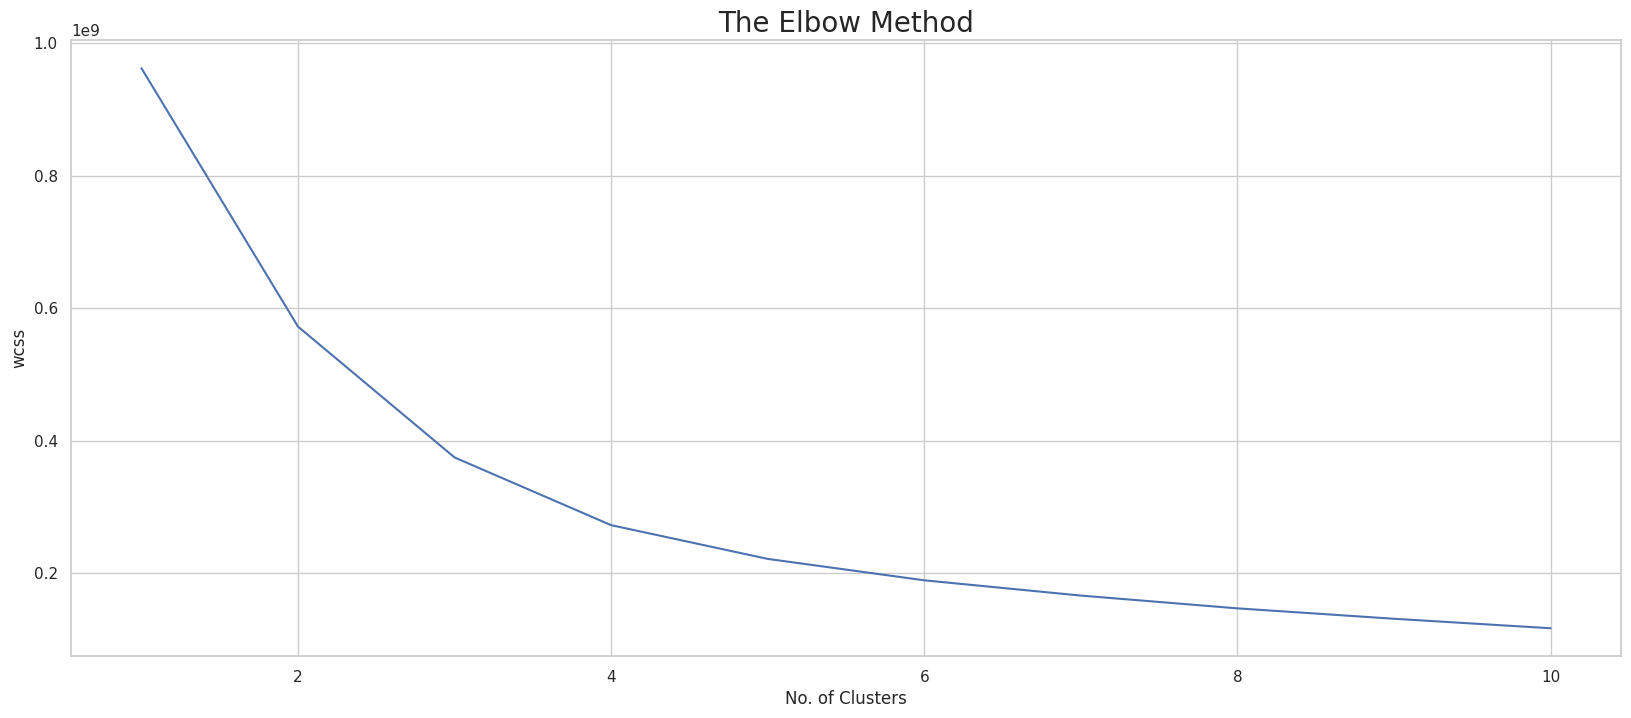

In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

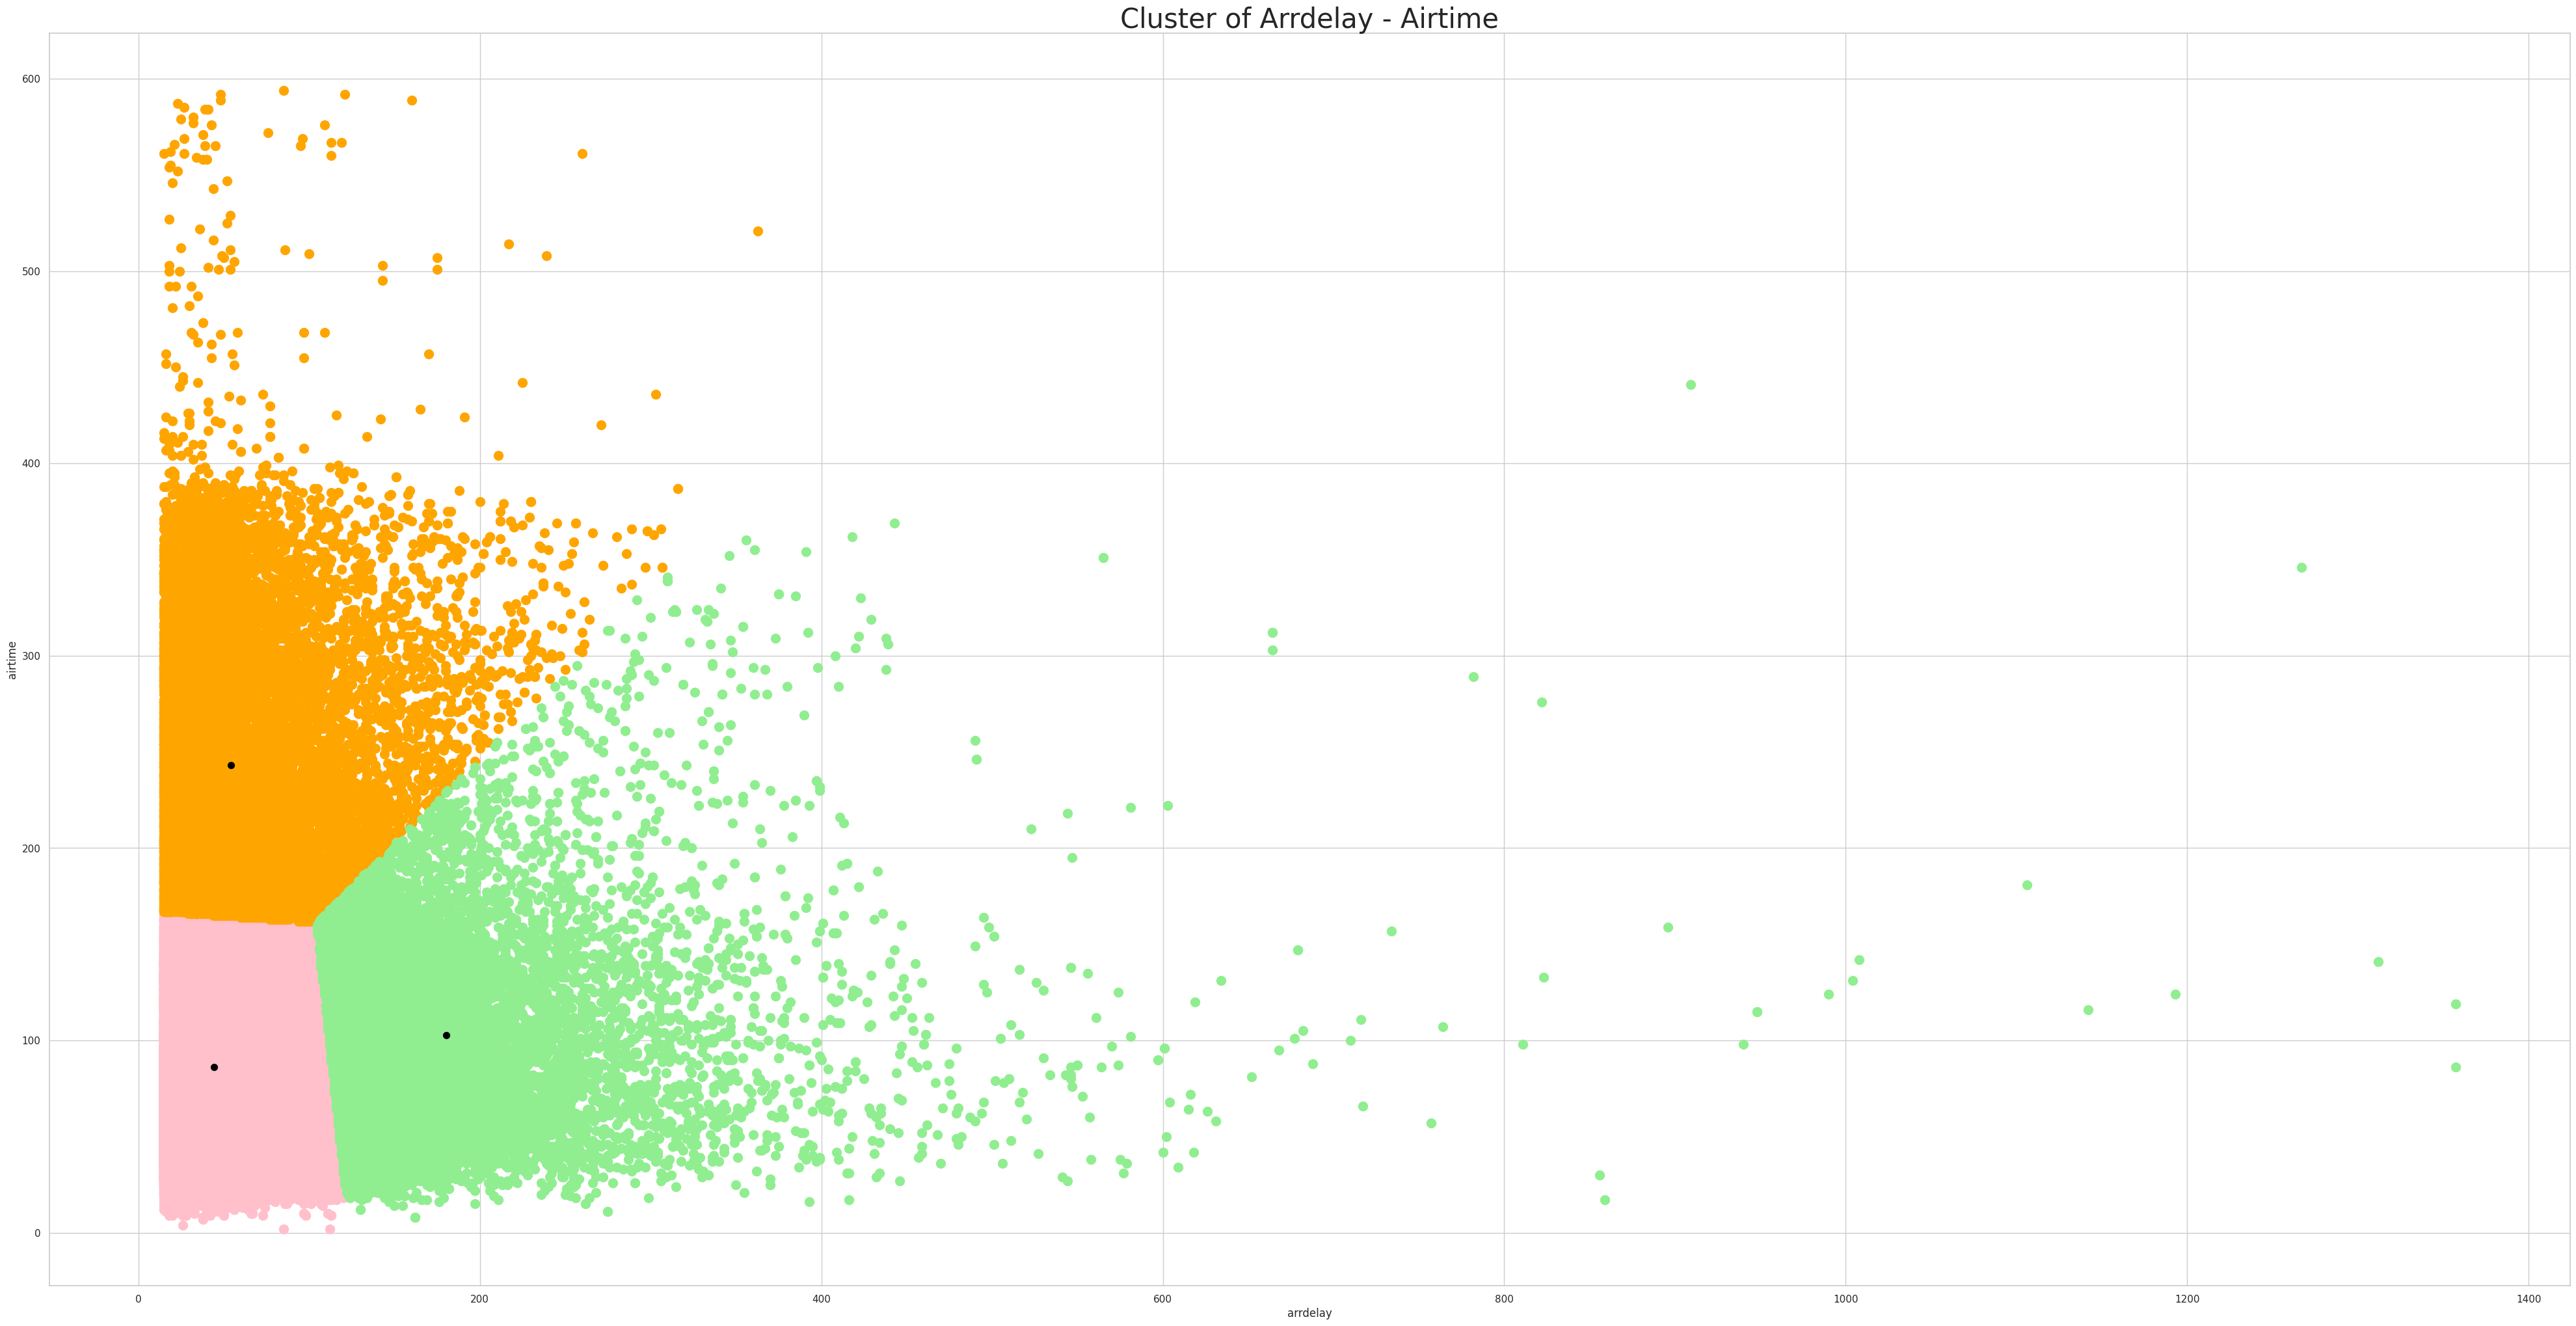

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(50,25))
plt.title('Cluster of Arrdelay - Airtime', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red')
# plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'yellow')
# plt.scatter(x[ymeans == 5, 0], x[ymeans == 5, 1], s = 100, c = 'purple')
# plt.scatter(x[ymeans == 6, 0], x[ymeans == 6, 1], s = 100, c = 'brown')
# plt.scatter(x[ymeans == 7, 0], x[ymeans == 7, 1], s = 100, c = 'blue')
# plt.scatter(x[ymeans == 8, 0], x[ymeans == 8, 1], s = 100, c = 'grey')
# plt.scatter(x[ymeans == 9, 0], x[ymeans == 9, 1], s = 100, c = 'green')
# plt.scatter(x[ymeans == 10, 0], x[ymeans == 10, 1], s = 100, c = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('arrdelay')
plt.ylabel('airtime')
plt.show()

In [19]:
from collections import Counter
Counter(ymeans)

Counter({0: 77844, 1: 19035, 2: 13121})

### cluster all

In [ ]:
pd.set_option('display.max_columns', None)
balanced_data.head()

In [ ]:
len(balanced_data)

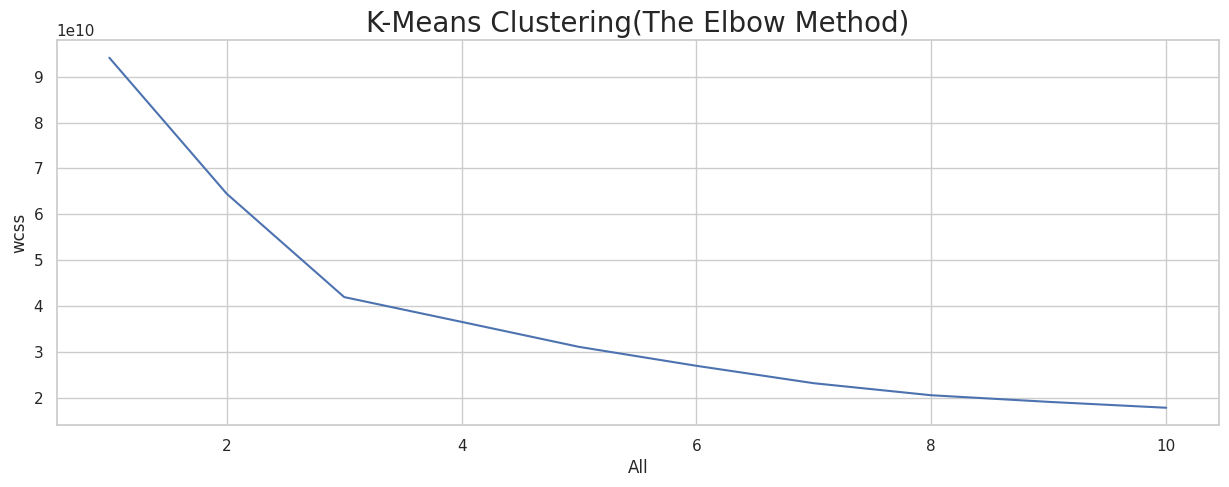

In [31]:
#clusterall
x = balanced_data.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)
#pca.inverse_transform

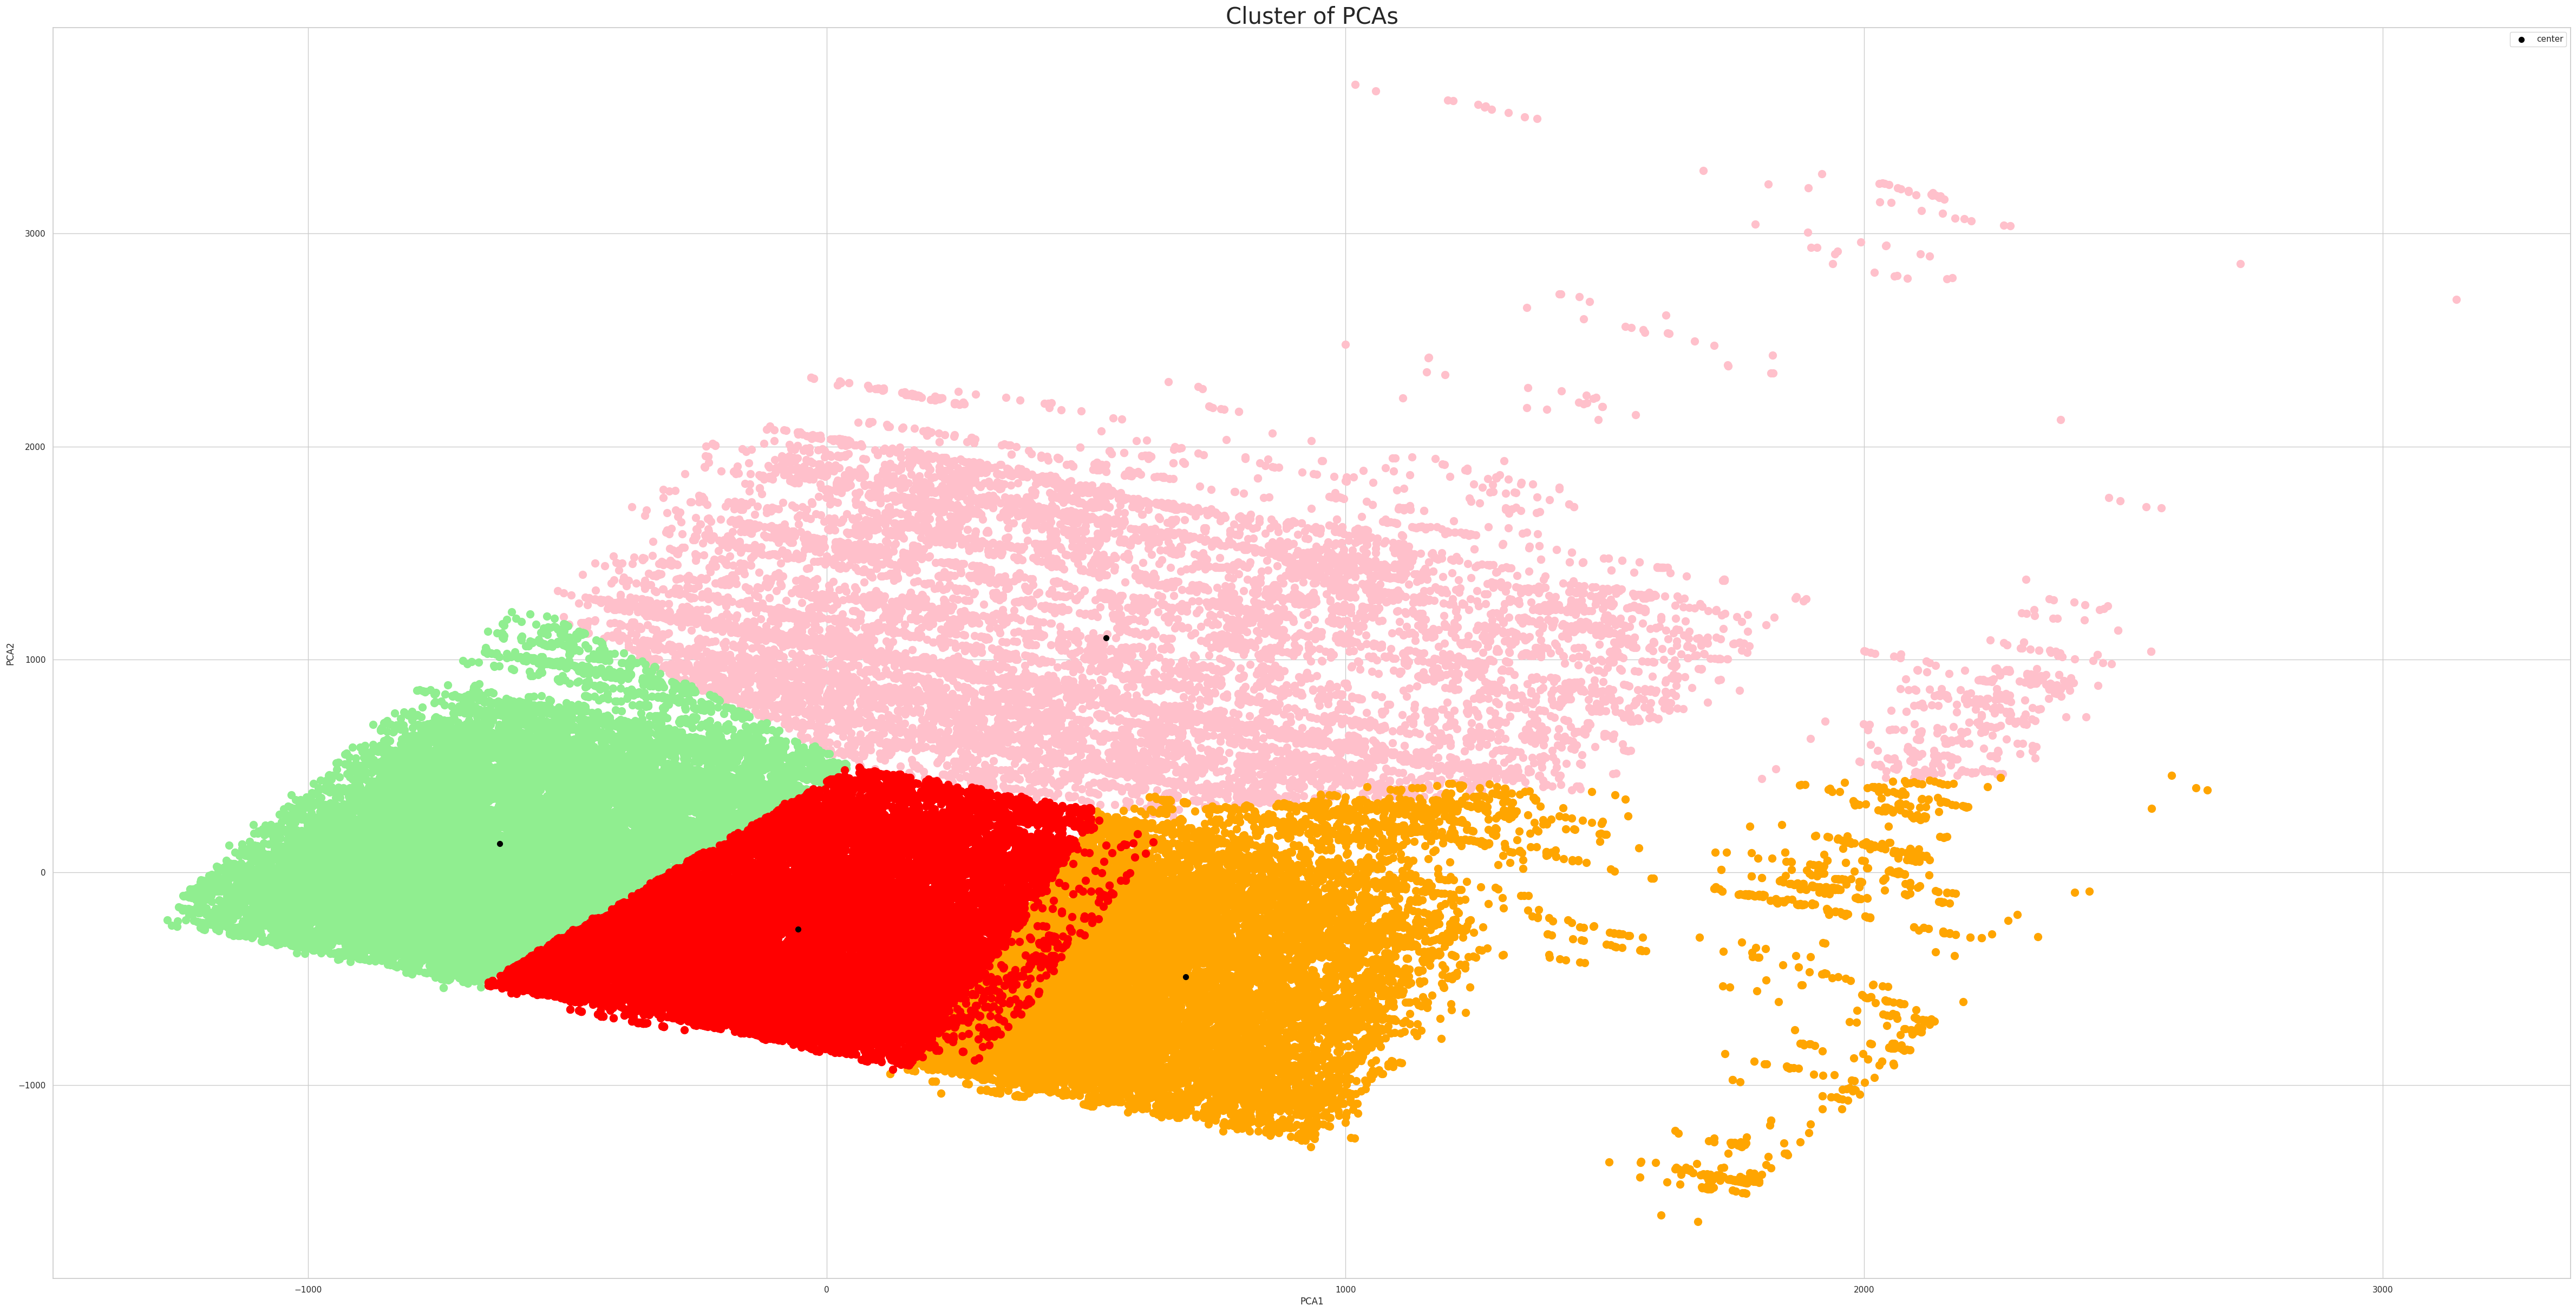

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(60,30))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'red')
#plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'blue')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [34]:
print(pca_x.shape)

(110000, 2)


#### DBSCAN

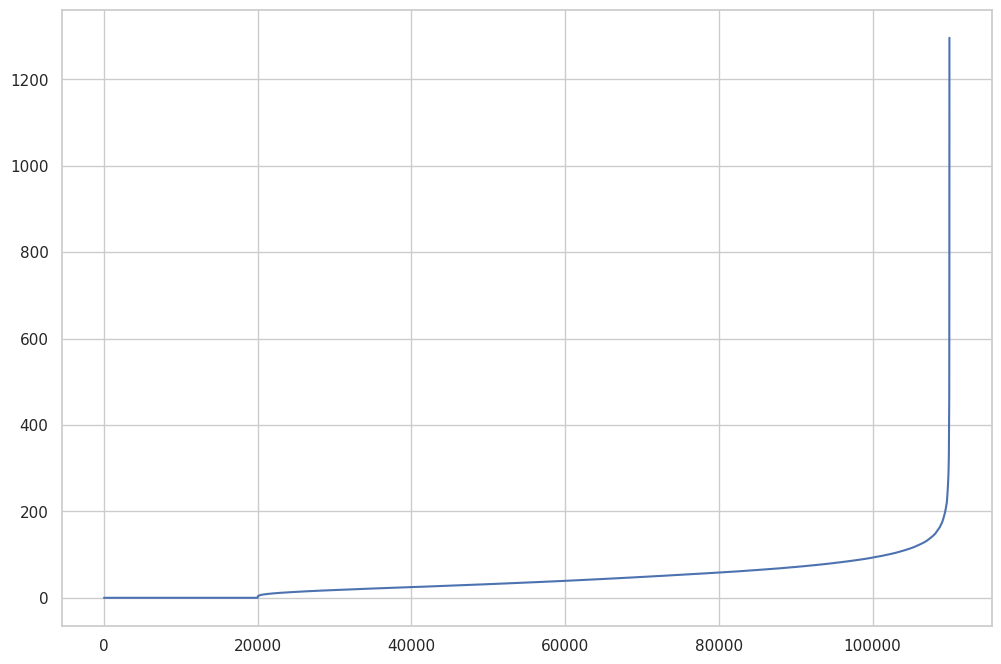

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

#x = balanced_data.drop(["uniquecarrierid"], axis=1).values
x = balanced_data.values
neigh = NearestNeighbors(n_neighbors=2, n_jobs=-1, algorithm='ball_tree', leaf_size=5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [39]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=200, min_samples=201, algorithm="ball_tree", n_jobs=-1).fit(x) #Scegli distanza
ymeans = db.labels_

In [40]:
list(set(db.labels_))

[0, 1, 2, 3, 4, 5, 6, 7, -1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


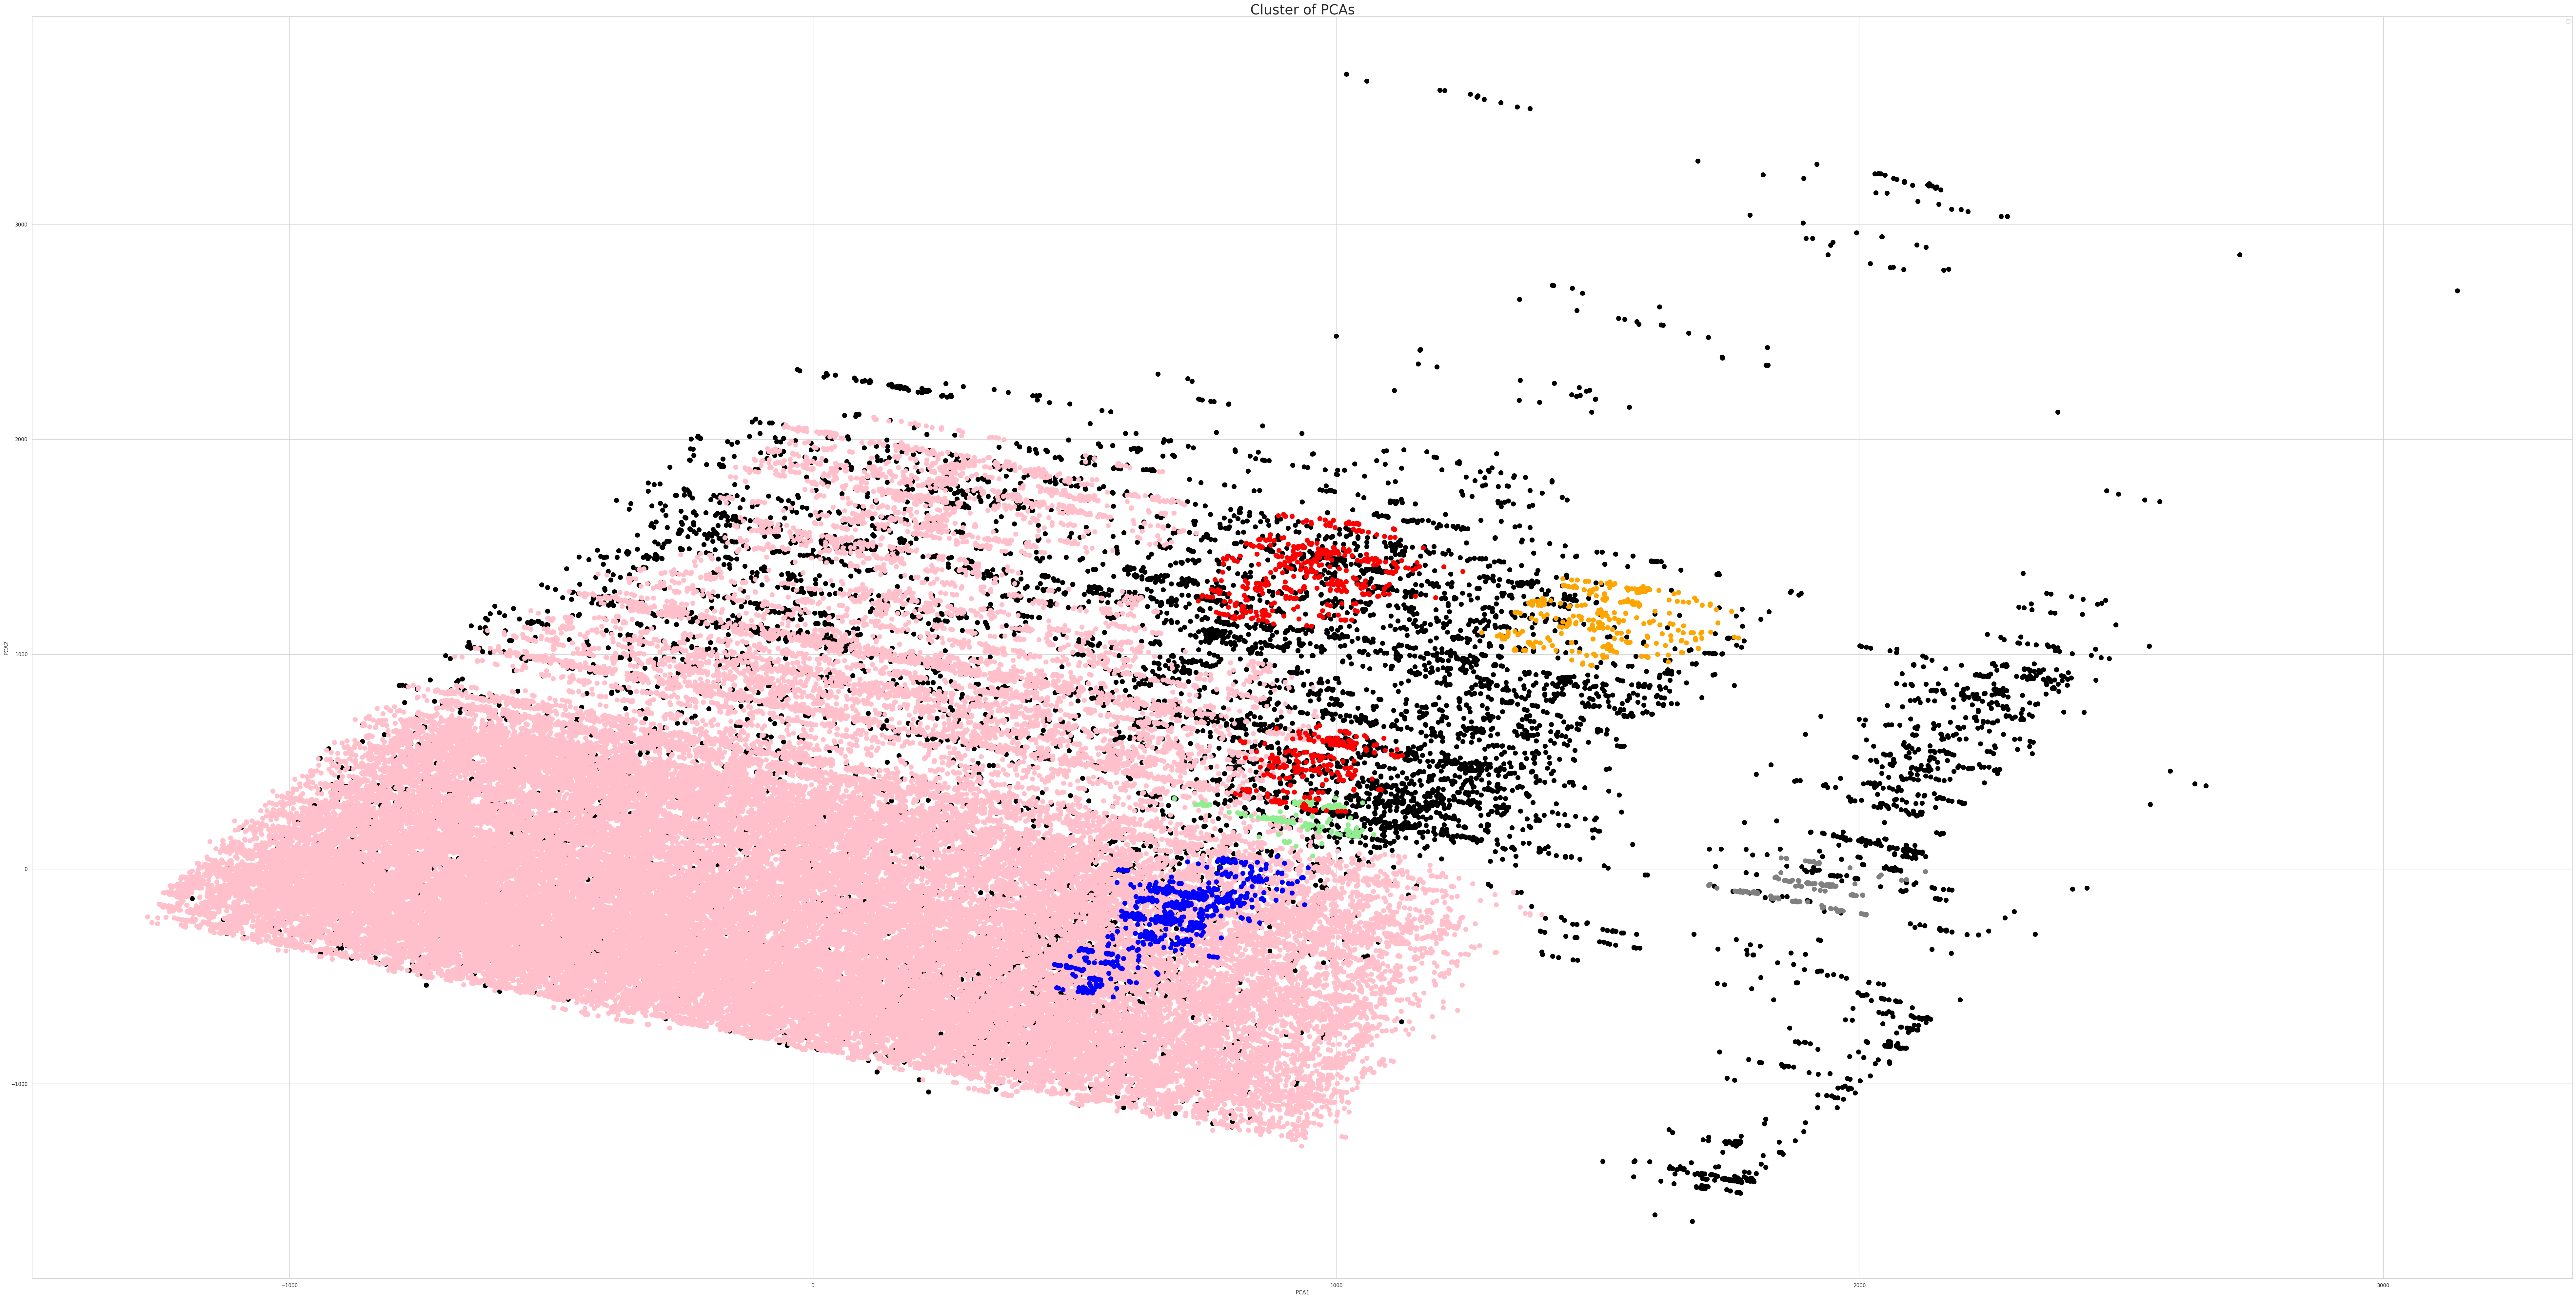

In [44]:
plt.figure(figsize=(100,50))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')
plt.scatter(pca_x[ymeans == 6, 0], pca_x[ymeans == 6, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

##### yellowbricks and silhouette


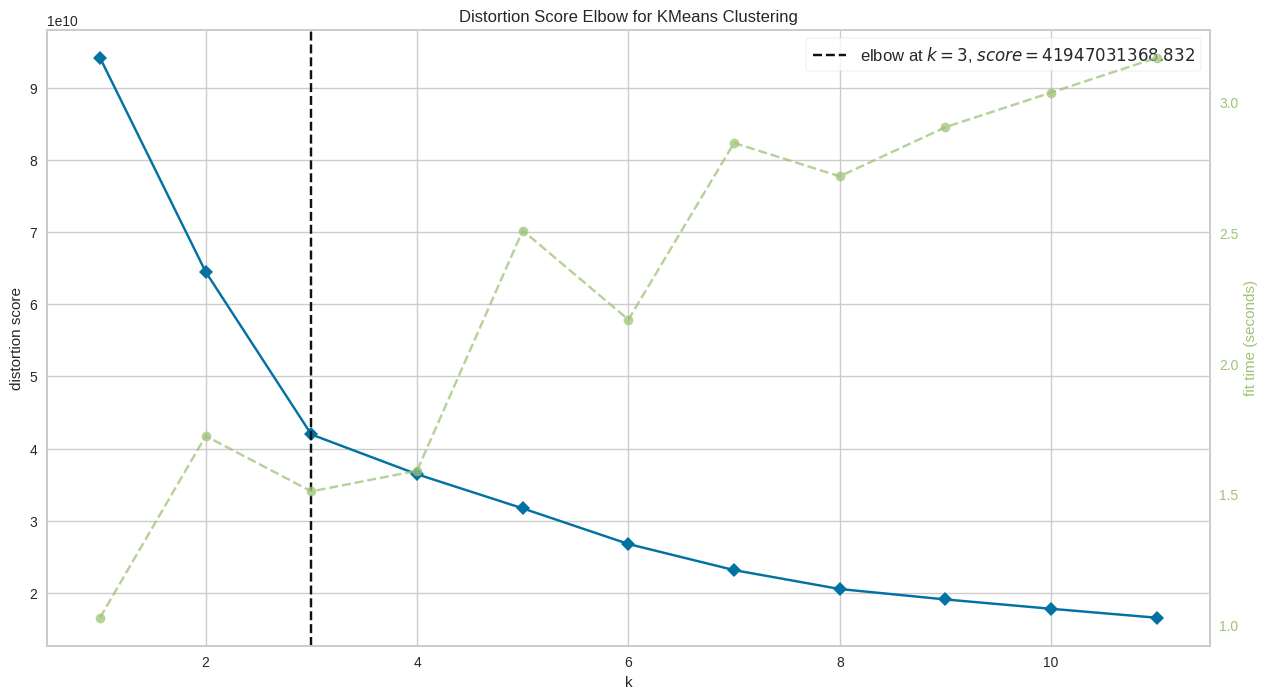

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

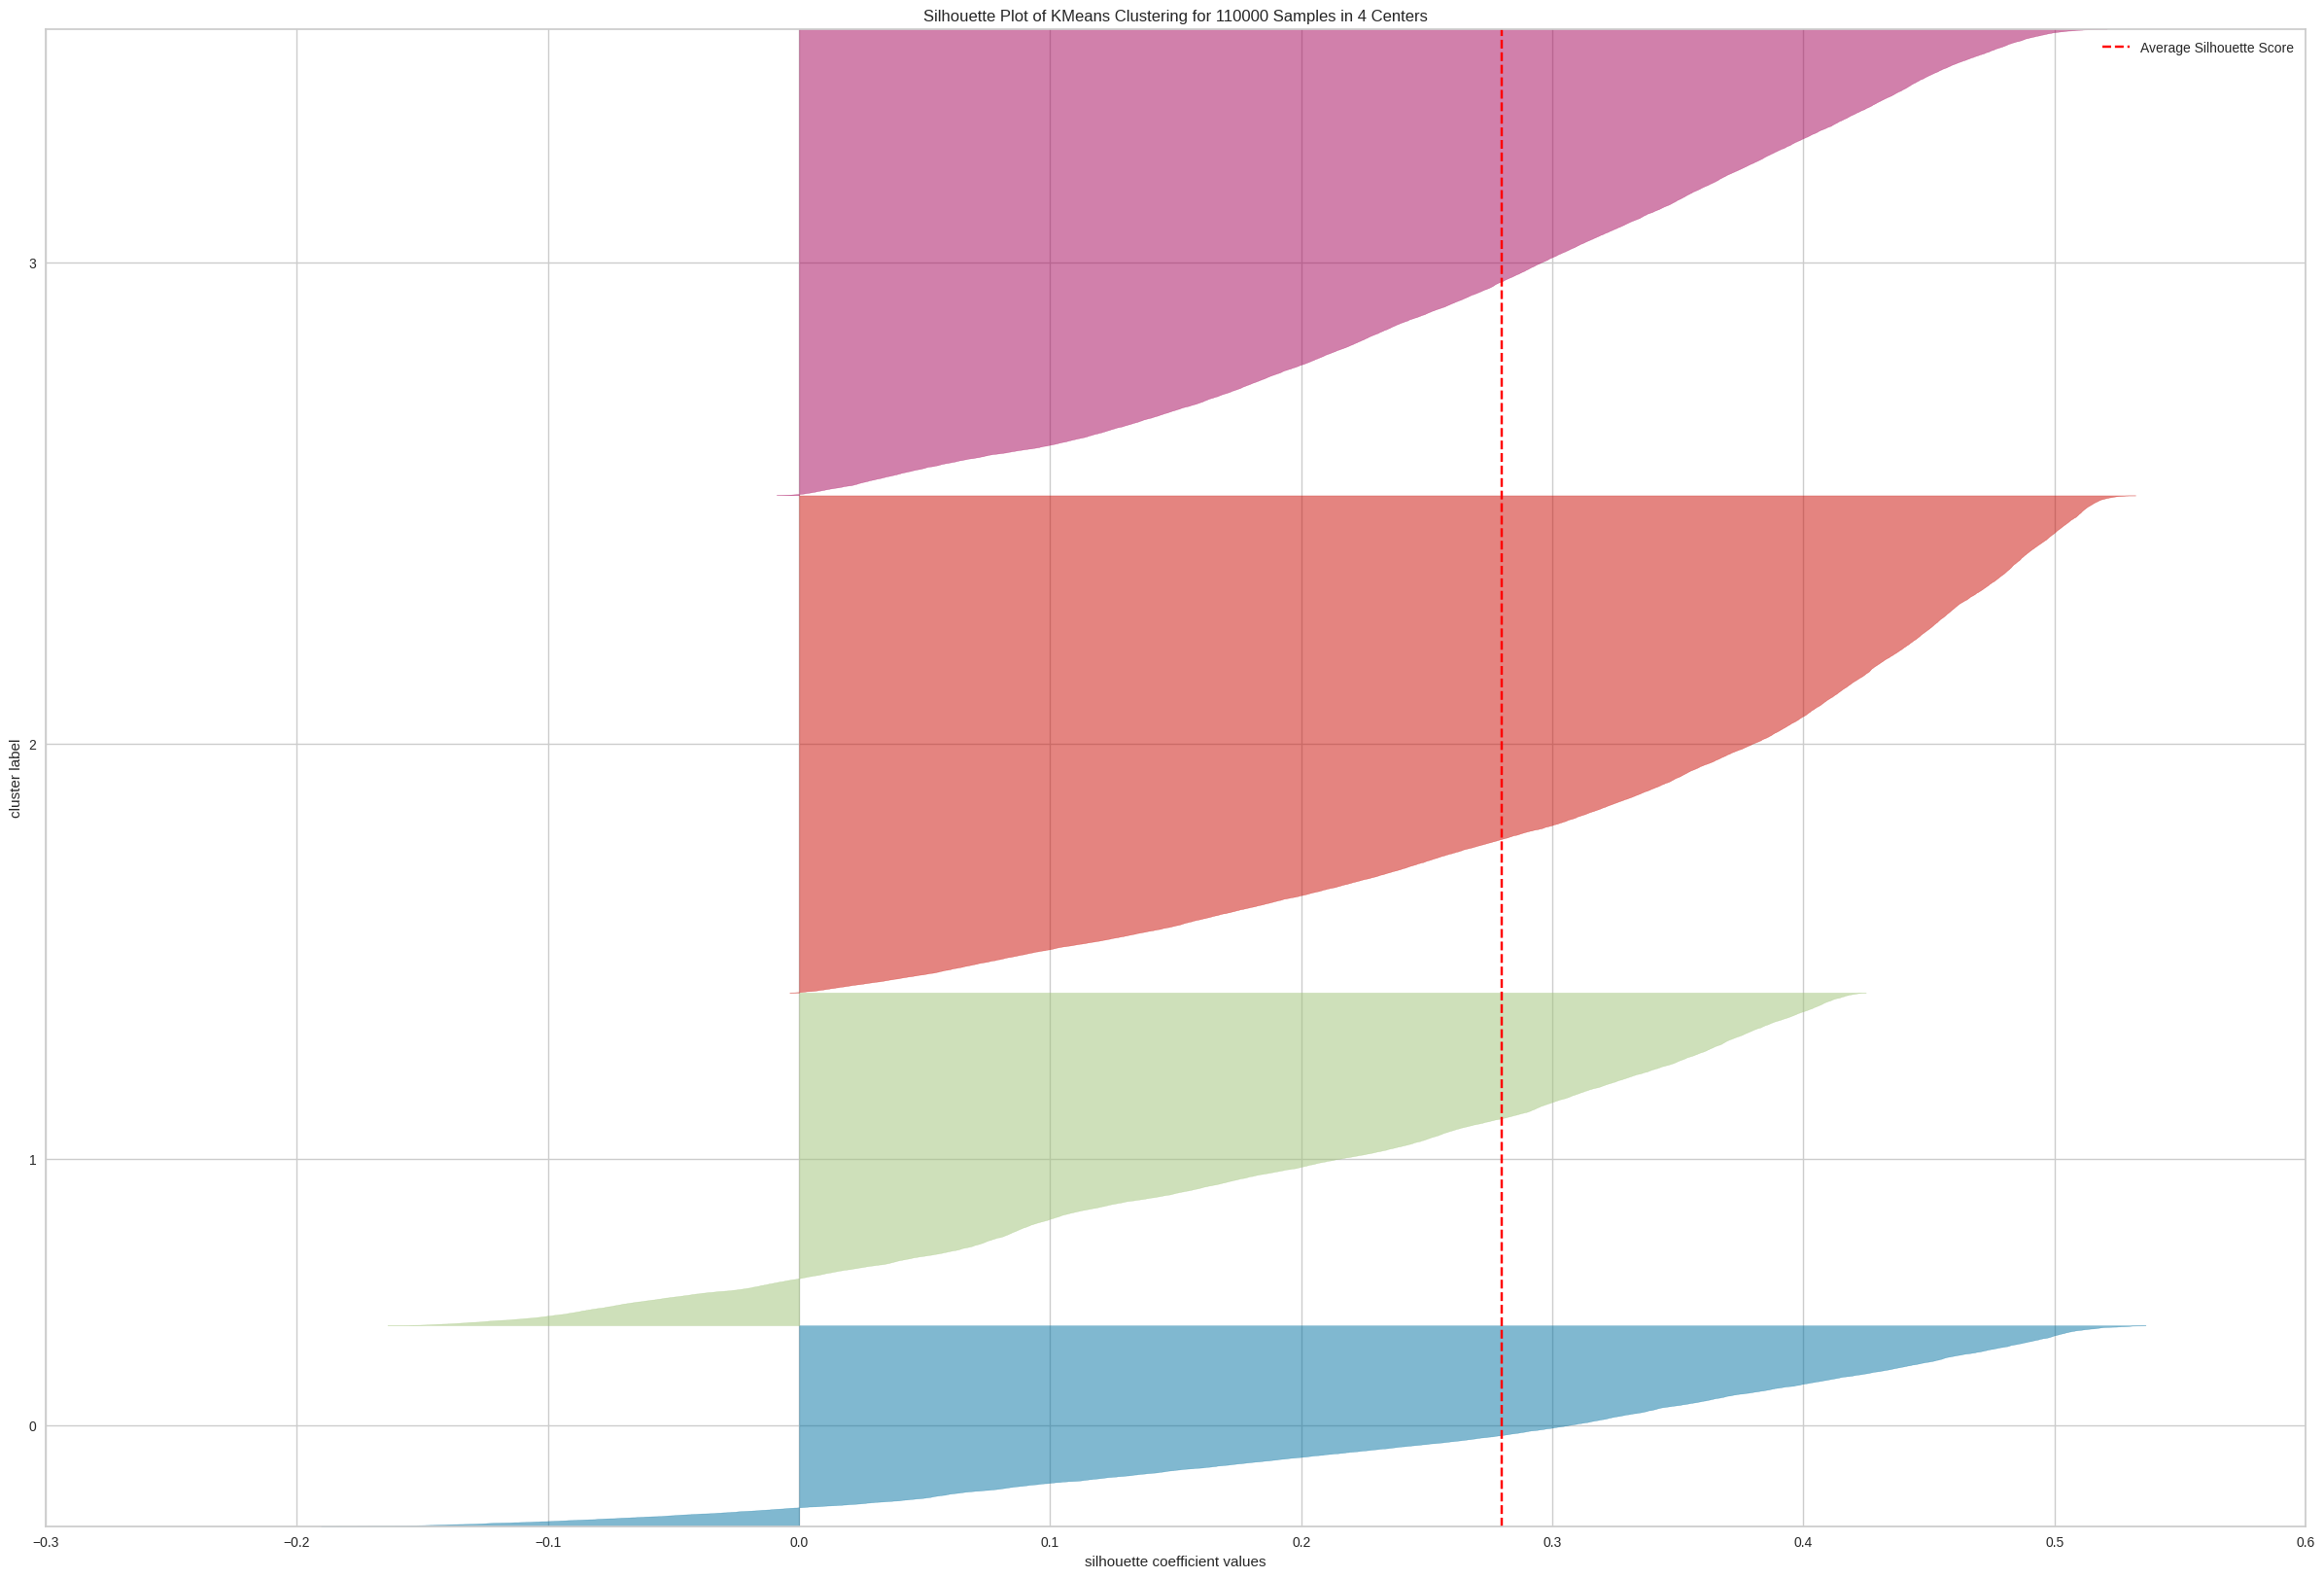

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 110000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

#questa silhouette viene fuori con la x che contiene balanced data filtrato weatherdelay e carrierdelay
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(30,20))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [47]:
x = balanced_data.loc[:,['carrierdelay', 'weatherdelay']].values

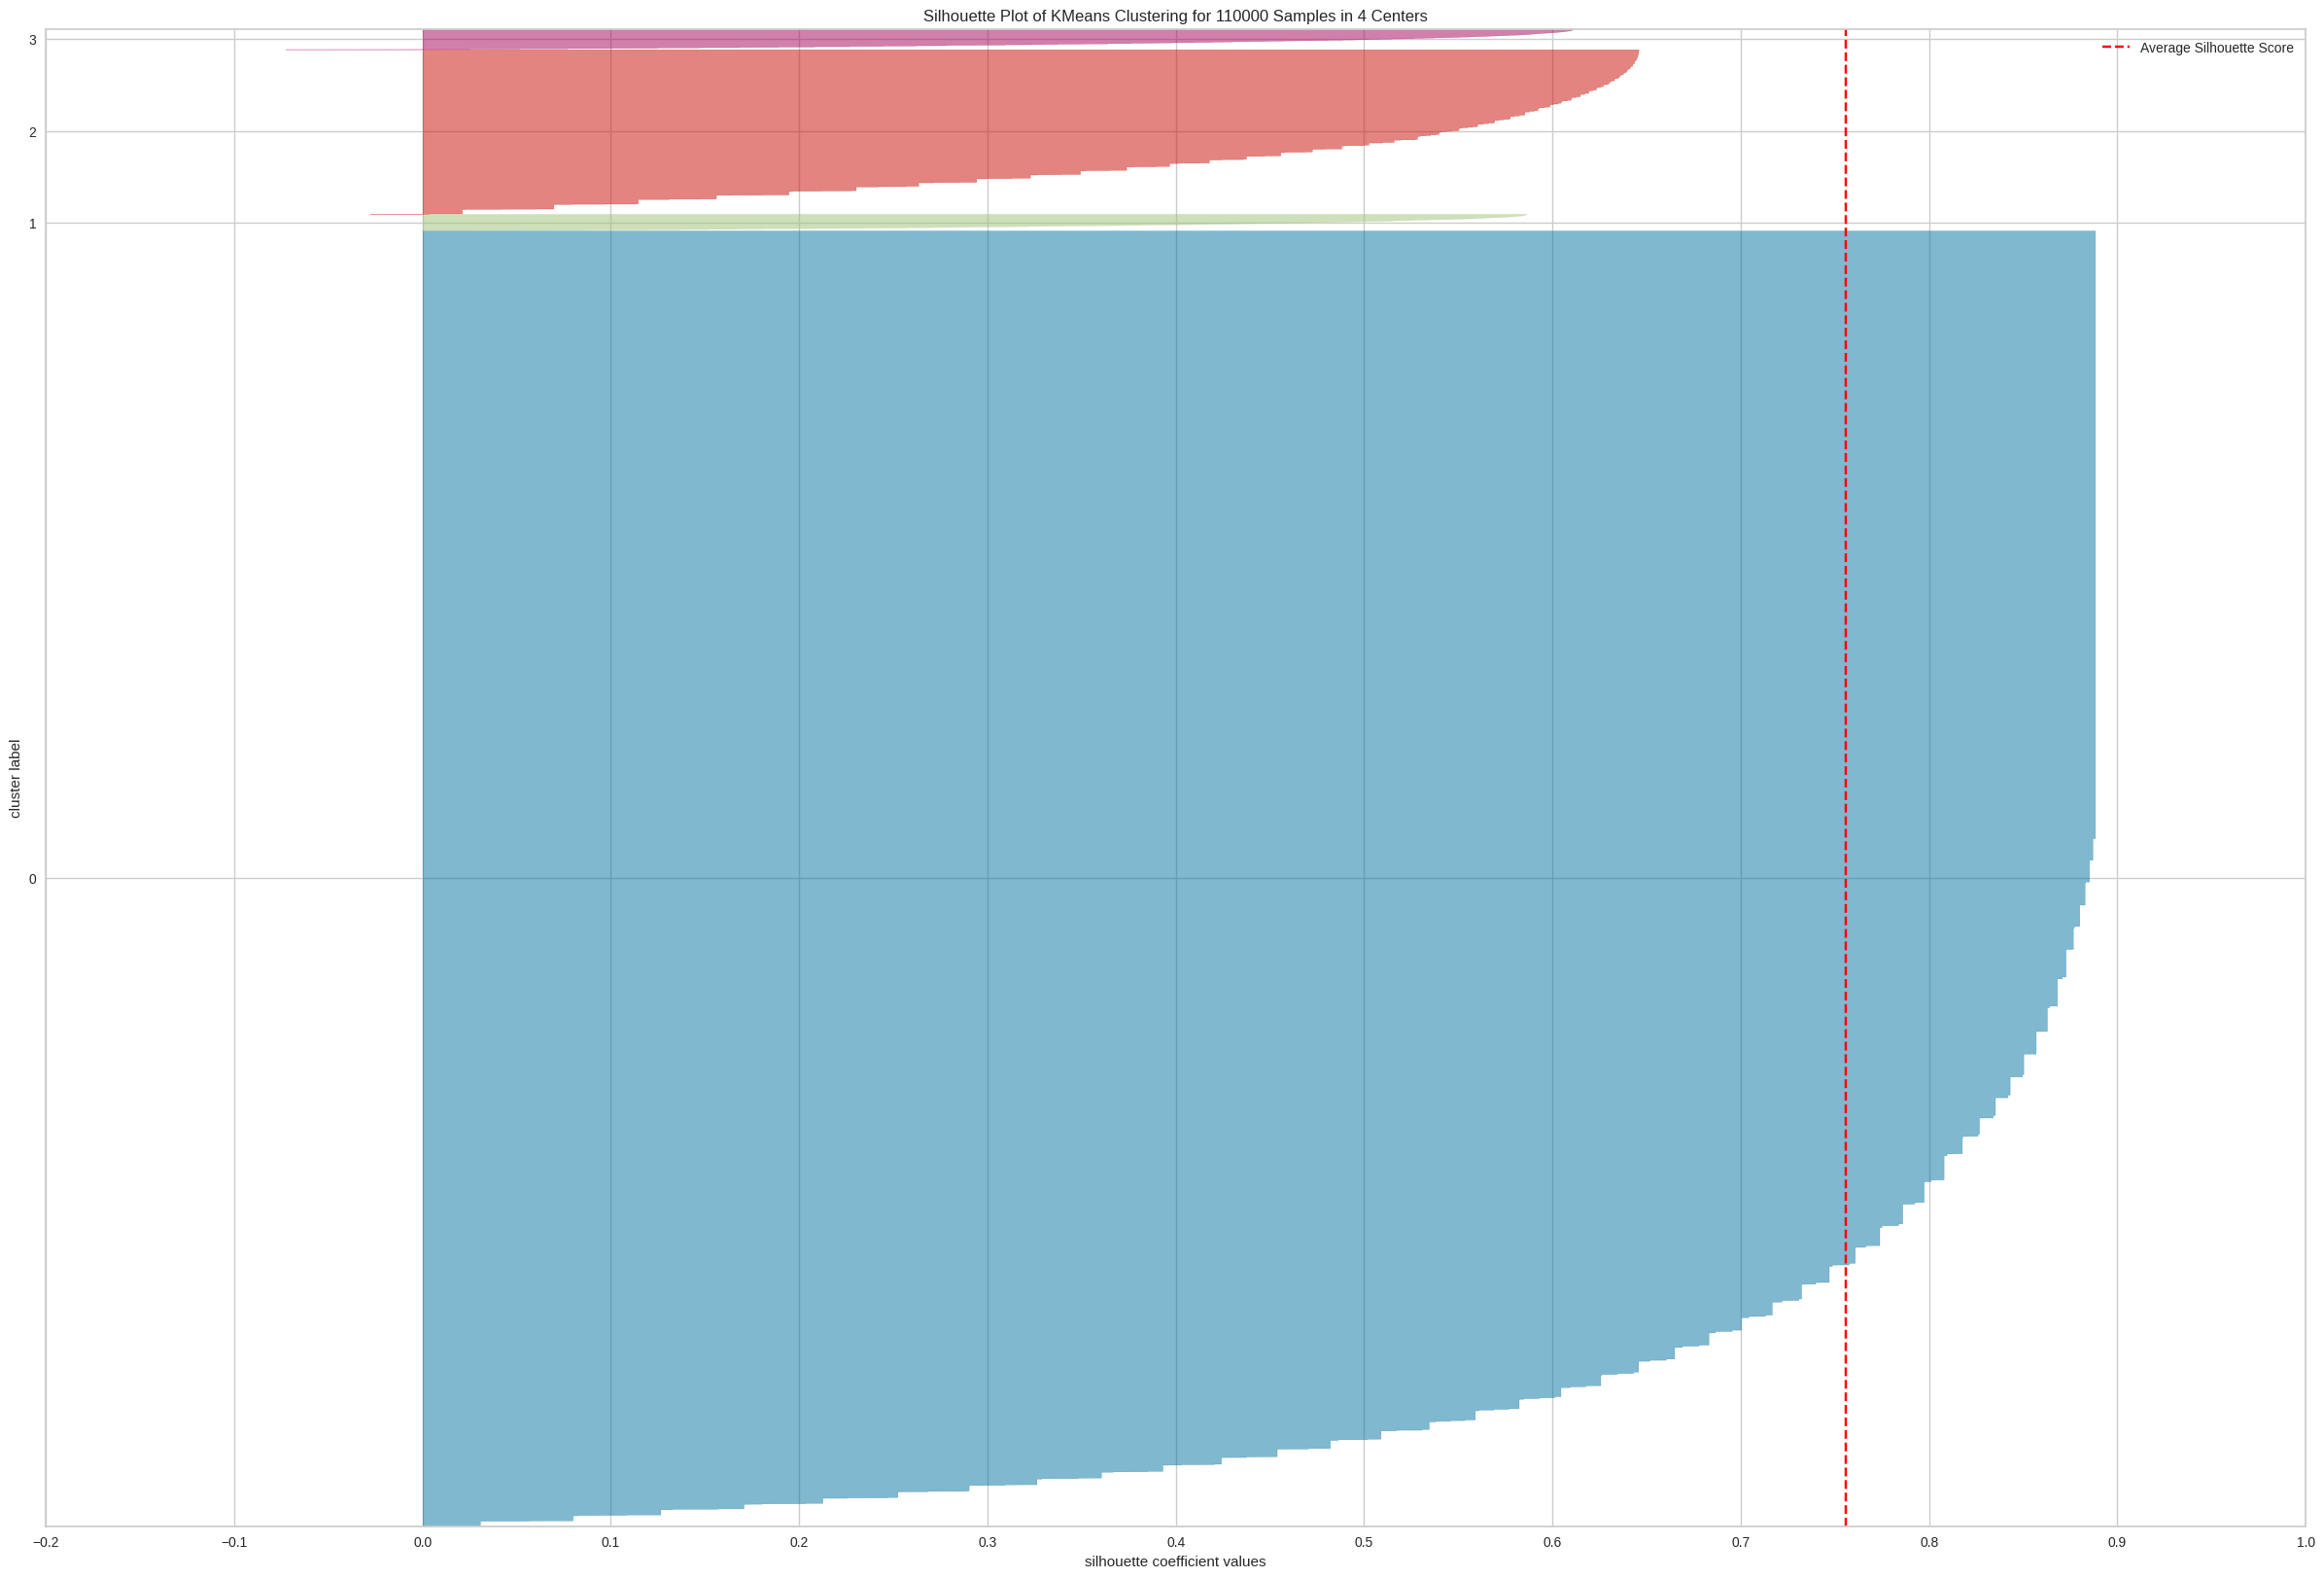

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 110000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

#questa silhouette viene fuori con la x che contiene balanced data filtrato weatherdelay e carrierdelay
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(30,20))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure